# Openrefine

**Inhalt:** Intro in ein advanced Datencleaning-Tool

**Nötige Skills:** keine

**Lernziele:**
- Erkennen, wann es Sinn machen kann, Daten nicht in Pandas, sondern in anderen Tools zu bearbeiten
- Einblick in das ziemlich praktische Programm Openrefine
- Grenzen von Openrefine

### Installieren

- Go to: http://openrefine.org/download.html
- Download the Mac (or Windows) kit
- Install
- Possibly: Ctrl-Click to open (on Mac)


### Ressourcen
- Wiki is useful https://github.com/OpenRefine/OpenRefine/wiki
- GREL docs https://github.com/OpenRefine/OpenRefine/wiki/Documentation-For-Users#reference
- Tutorials http://www.datacarpentry.org/OpenRefine-ecology-lesson/01-working-with-openrefine/
- Videos https://github.com/OpenRefine/OpenRefine/wiki/Screencasts

## Beispiel Banken aus Twixtel

- Eine händische Extraktion aus dem Twixtel
- Pfad: `dataprojects/Banken/2017 - MERGED.csv`
- Eine "kategorisierte" Adressliste von Bankfilialen in der Schweiz
- Die Daten sind eher hässlich

### Projekt starten
- Open file
- Parse settings
- "create project"

In [2]:
from IPython.display import display, Image

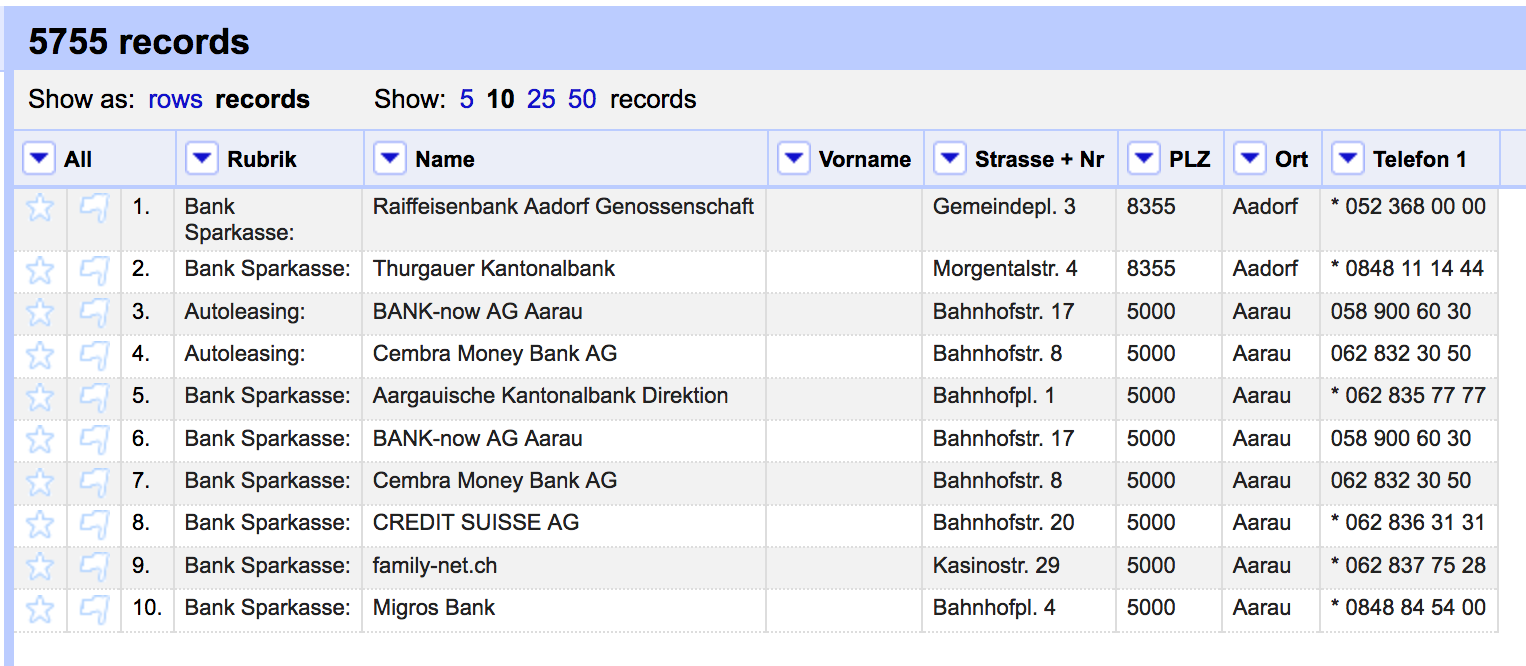

In [3]:
img = Image(filename='dataprojects/Banken/open.png')
display(img)

### Navigation
- Show 5 / 10 / 25 / 50 records
- Show as: records / rows

### Einträge Filtern

Eine Basisfunktion in Openrefine. Zeigt nur einen Teil der Datensätze an, auf die sich die aktuelle Bearbeitung beschränkt.

- Vorname -> **Text Filter**: "Vorname"

### Einträge Löschen
- All -> Edit Rows -> Remove all matching rows

### Spalten Kopieren
- Name -> Edit Column -> Add column based on this column

### Einträge Editieren

zum Beispiel: nach einem Filter, basierend auf einer existierenden Spalte eine zweite Spalte benennen.

Siehe auch: https://github.com/OpenRefine/OpenRefine/wiki/Column-Editing

- Rubrik -> Text Filter: "ubs\s" (Regex sind möglich)
- Bank -> Edit cells -> **Transform**
- Bsp Edit: `"UBS " + cells["Name"].value`

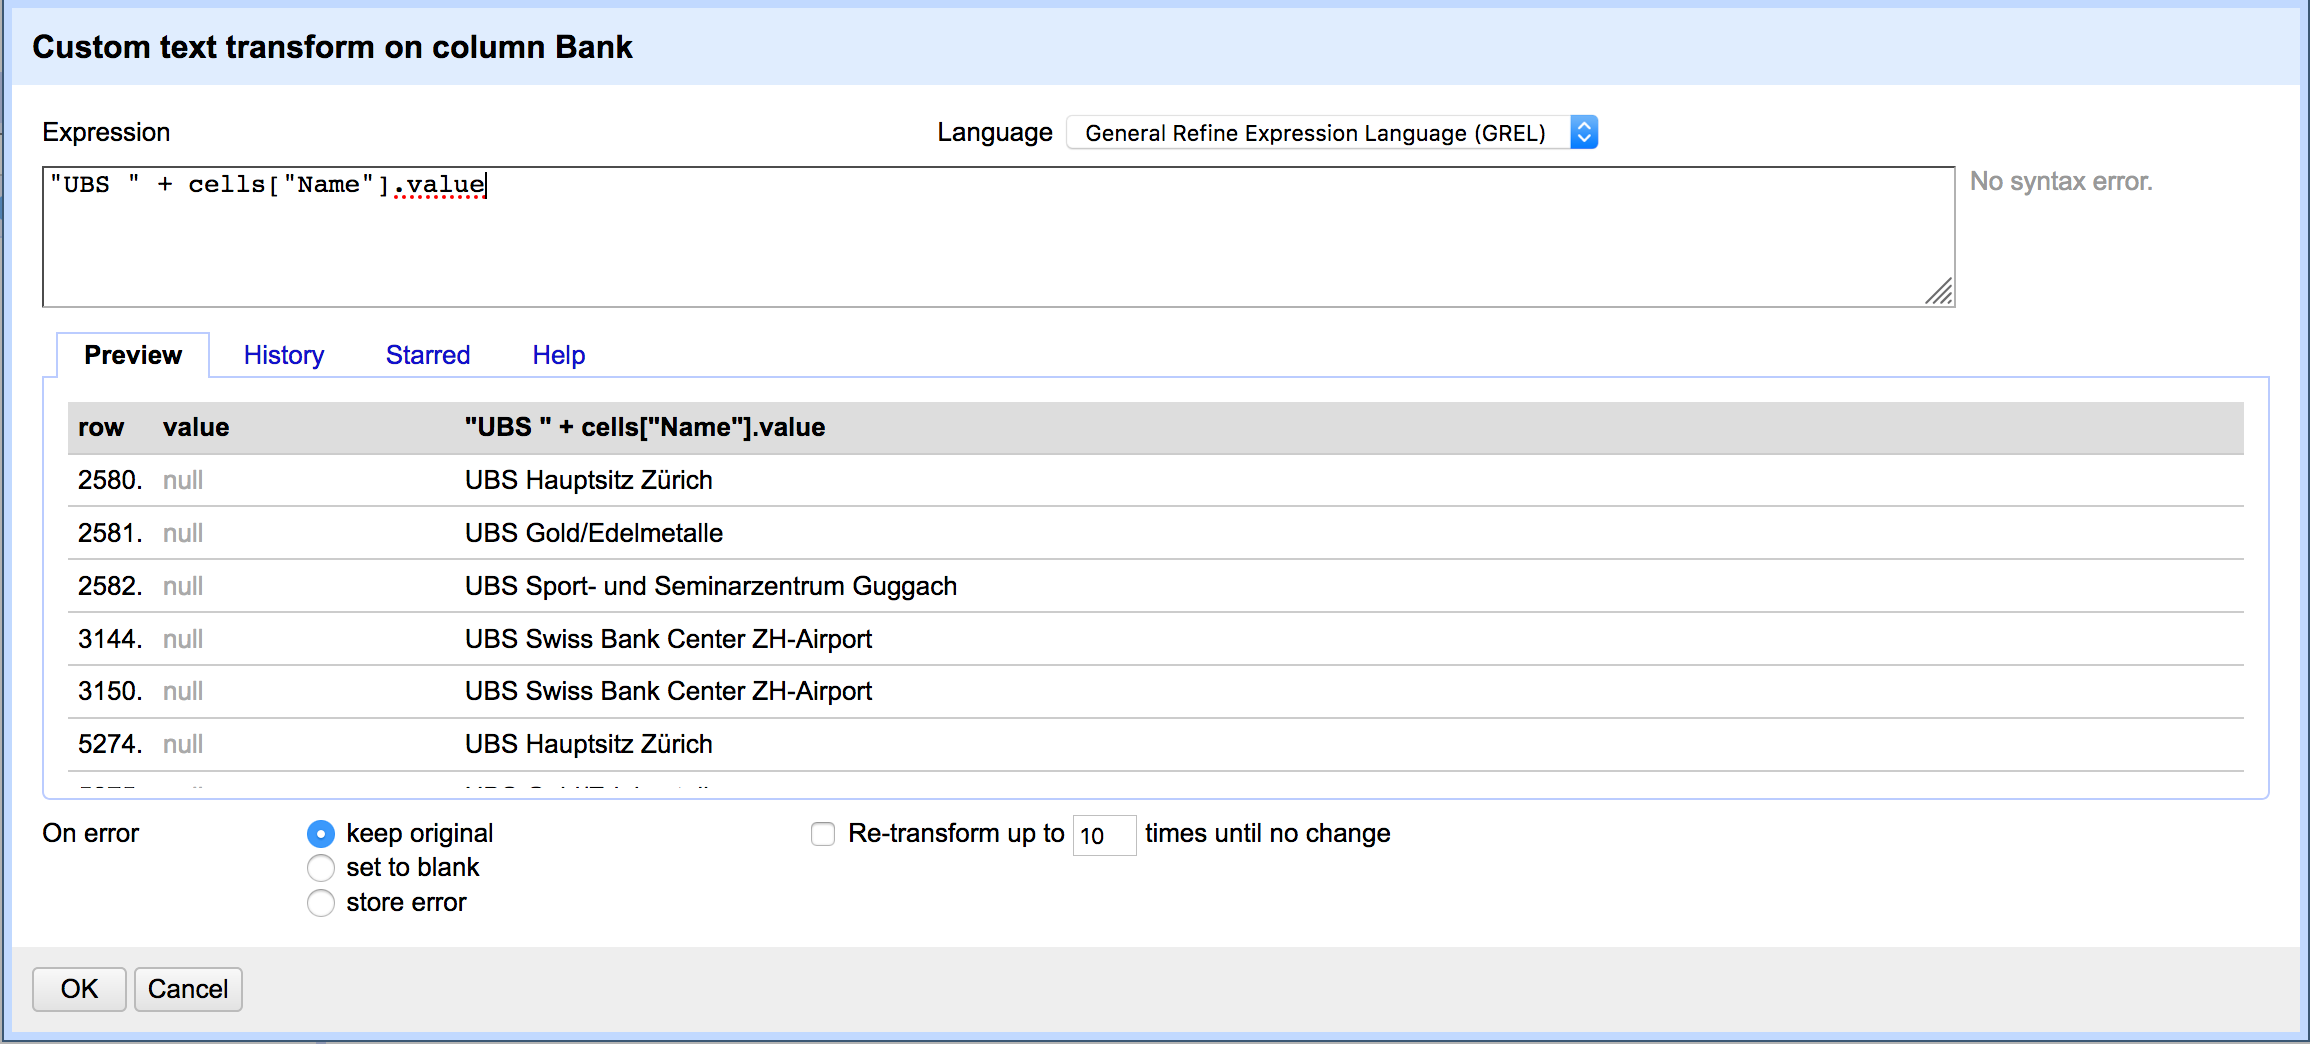

In [4]:
img = Image(filename='dataprojects/Banken/transform.png')
display(img)

### Putzen

Zum Beispiel: Den Zusatz "AG" aus allen Namen löschen.

- Bank -> Edit cells -> Transform
- Use GREL: https://github.com/OpenRefine/OpenRefine/wiki/General-Refine-Expression-Language
- Bsp: Replace content: `value.replace(' AG','')` 

### Undo

Operationen rückgängig machen ist jederzeit Möglich...
- Undo any number of operations

### Facet

Eine zweite Basisfunktion in Openrefine: Erlaubt einfacheres Browsen und Sichten der Werte, ähnlich wie value_counts() in Pandas.
- Bank -> Facet -> **Text facet**
- Sort by name / count
- Einfaches batch-editing möglich (z.B. "CREDIT SUISSE" -> Credit Suisse)

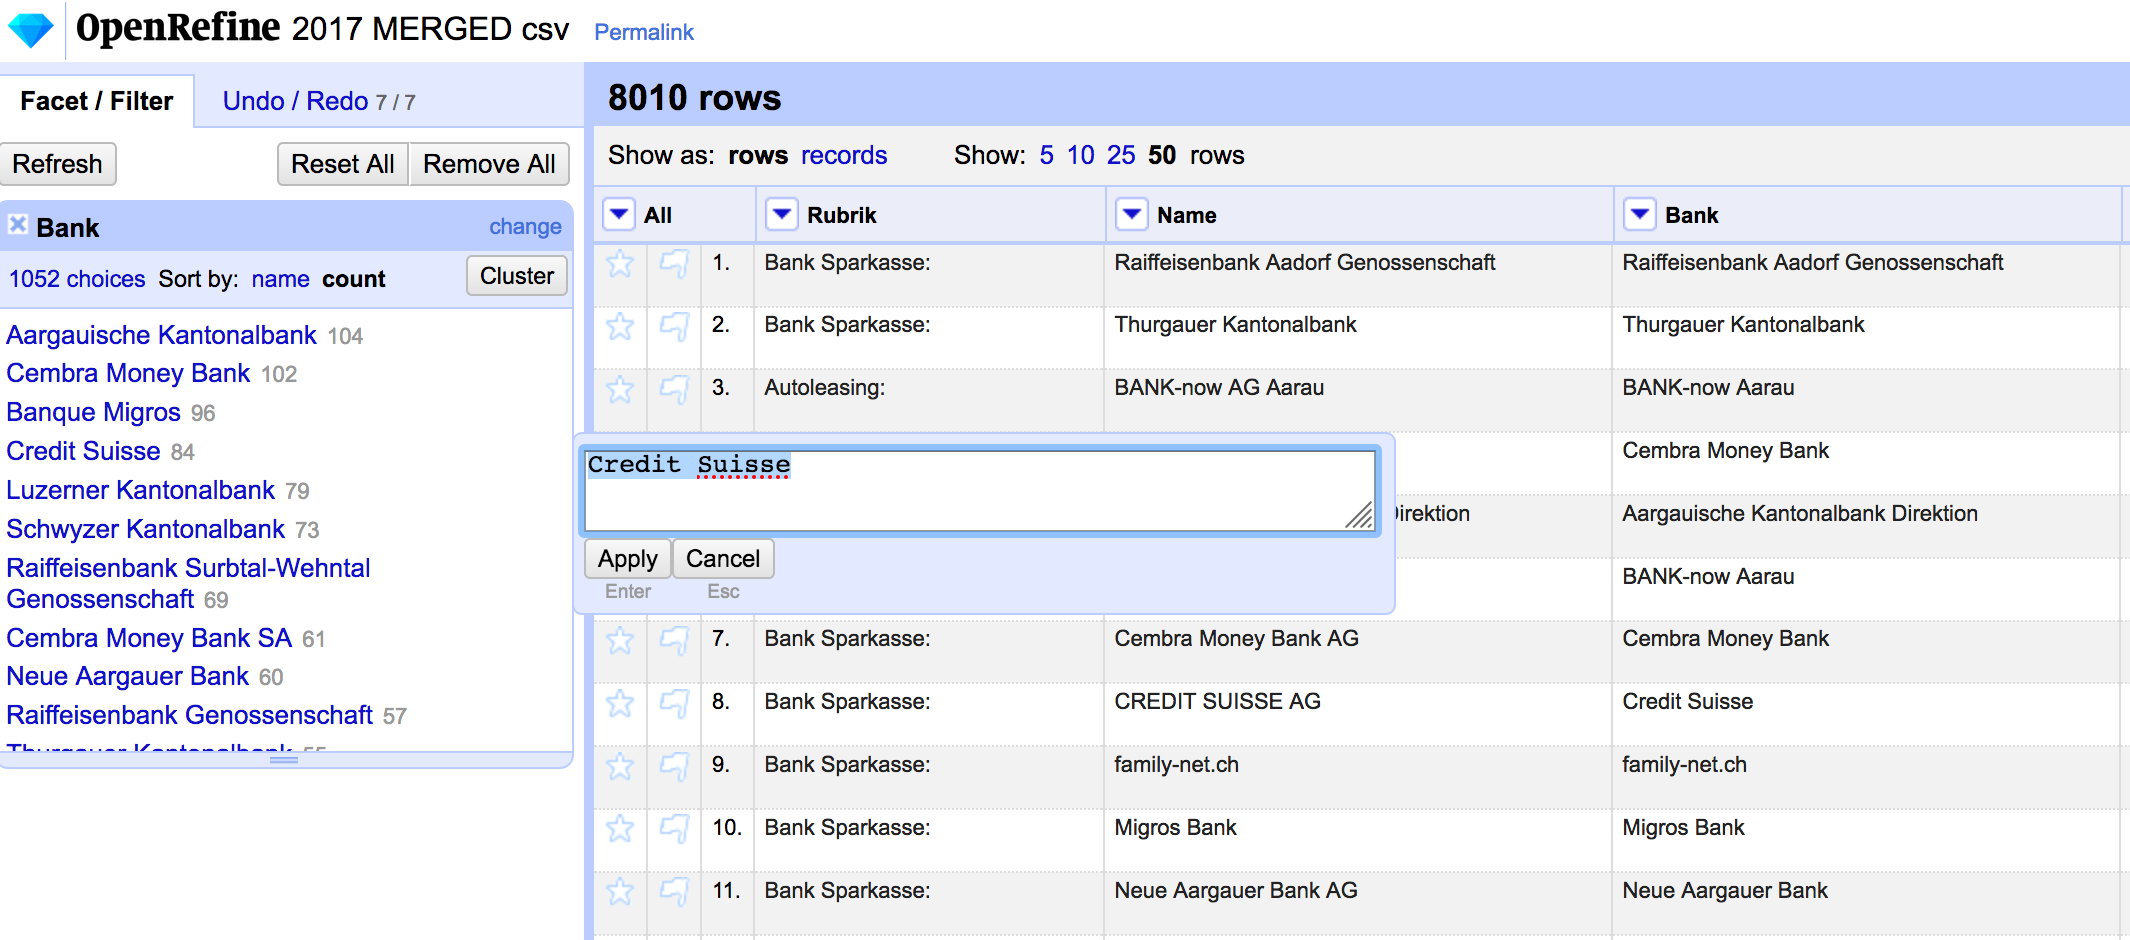

In [5]:
img = Image(filename='dataprojects/Banken/batch-edit.png')
display(img)

### Typisieren

zB alle Raiffeisenbanken. Ähnlich wie in Excel vorgehen:
- neue Spalte erstellen: Bank -> Edit column -> Add column based on this column -> ('')
- Bank -> Text filter -> "Raiffeisen"
- Typ -> Edit cells -> Transform: "Raiffeisen"

### Clustering

Hier wird es interessant. In Openrefine gibt es eine Reihe eingebauter Fuzzy-String-Searches.

- Bank -> edit cells -> **Cluster and edit**
- Methode auswählen
- bei einzelnen Einträgen: Variante wählen
- Select all (oder nur einzelne Cluster)
- Merge and re-cluster
- Am besten: mehrere Runden mit diversen Methoden durchführen

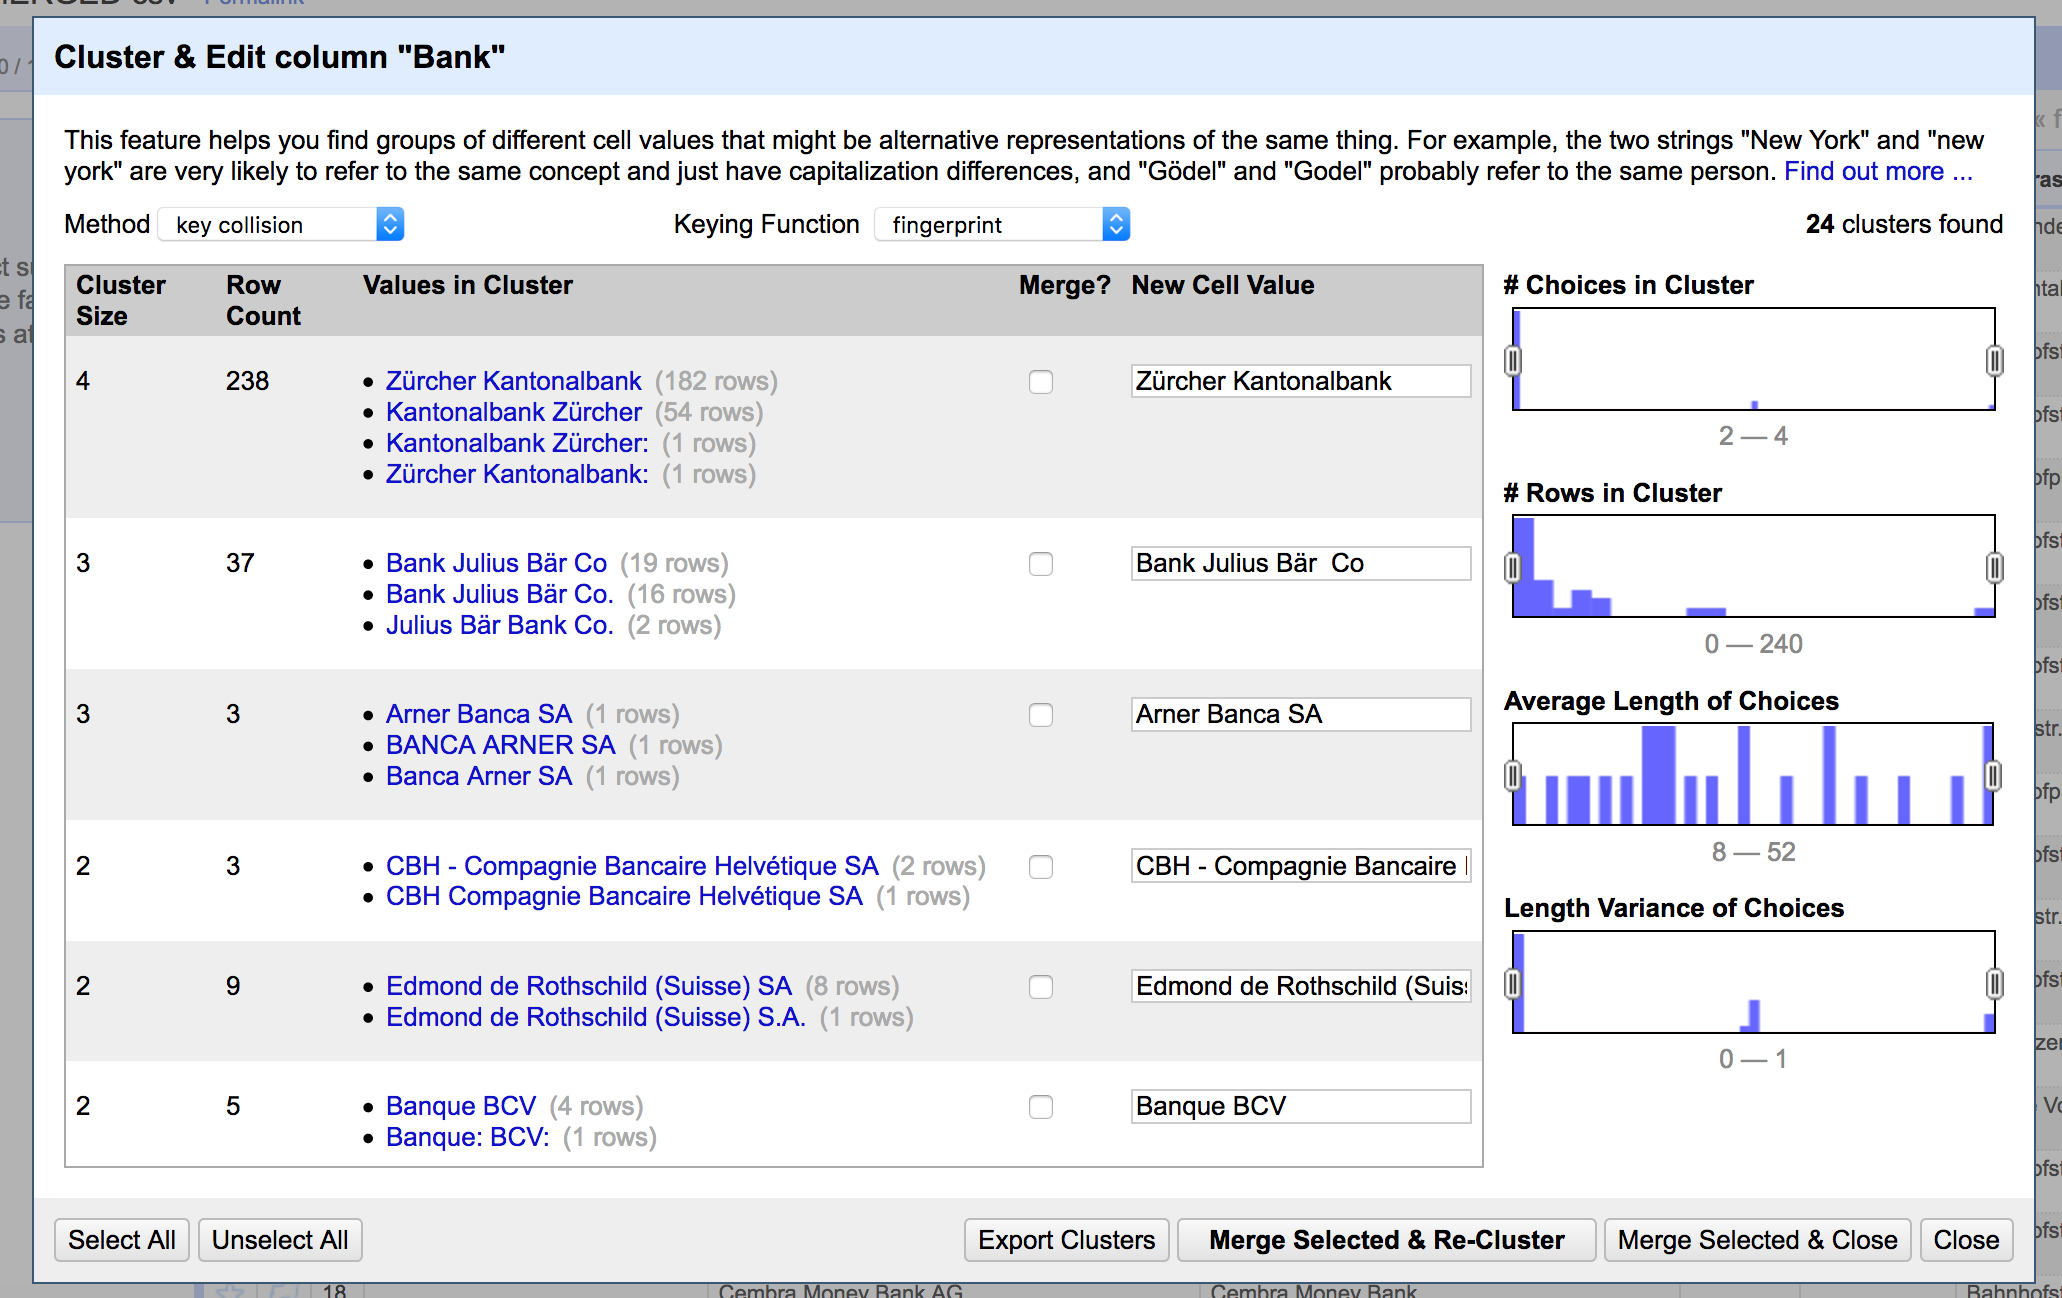

In [6]:
img = Image(filename='dataprojects/Banken/clustering.png')
display(img)

### Methoden

Die Liste: https://github.com/OpenRefine/OpenRefine/wiki/Clustering-In-Depth

**Key Collision**
- Faster in general
- Creates a "simplified" version (a key) of the string
- *Fingerprint:* removes all noise ("Cruise, Tom", "tom cruise"). Doesn't detect that much. (24 Clusters)
- *N-grams:* Can also detect typos ("Krystztof", "Krzystof")
- *Cologne Phonetic:* ("Julius Bär" / "Julius Baer") - even works in German!

**Nearest neighbor**
- Slower (can be very slow)
- Calculates "distance" between strings
- Blocking: speeds up the search
- Radius: bigger radius = more matches
- *Levenshtein:* Number of edit operations (https://en.wikipedia.org/wiki/Levenshtein_distance)
- *PPM:* length of the shortest possible description of the string. Creates rather many false positives https://en.wikipedia.org/wiki/Kolmogorov_complexity

**Achtung:** Auch die Matching-Methoden in Openrefine sind nicht perfekt. 100% Sicherheit, alles richtig kategorisiert und gereinigt zu haben, gibt es basierend auf automatischen Methoden nie!

### Projekt speichern

Entweder nur Tabellen, oder die ganze Projekthistory samt Daten abspeichern.

- Export -> Export project